In [ ]:
import torch
from diffusers import SanaPipeline

pipe = SanaPipeline.from_pretrained(
    "Efficient-Large-Model/Sana_600M_512px_diffusers",
    torch_dtype=torch.bfloat16,
)
pipe.to("cuda")

pipe.vae.to(torch.bfloat16)
pipe.text_encoder.to(torch.bfloat16)

prompt = 'A cute 🐼 eating 🎋, ink drawing style'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=4.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(42),
)[0]

image[0].save("sana.png")

In [1]:
import torch
from mini1o.dit import Mini1oDiT  # 修改为你实际的模块路径

# 构造包含各模型名称的配置字典
diffusion_config = {
    "model_name": "Efficient-Large-Model/Sana_600M_512px_diffusers",   # 扩散模型路径或名称
    "vae_model_name": "Efficient-Large-Model/Sana_600M_512px_diffusers",            # VAE 模型名称（请替换成实际有效的名字）
    "scheduler_model_name": "Efficient-Large-Model/Sana_600M_512px_diffusers",      # scheduler 名称（请替换成实际有效的名字）
}

# 实例化模型
model = Mini1oDiT(diffusion_config)
# 将模型部署到设备（例如 cuda）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(0)

0


In [ ]:
### 训练示例 ###

# 假设 clean_images 是形状 [bs, 3, H, W] 的输入图像张量
# 假设 prompt_embeds 和 prompt_attention_mask 是预先编码好的文本特征及注意力 mask（或你也可以不传，取决于你的任务设置）
clean_images = torch.randn((4, 3, 512, 512), device=device).to(torch.bfloat16)  # 4 张随机图像，仅作演示

# 若有文本条件，可以提供对应的编码向量与 mask，否则传入 None
prompt_embeds = torch.randn((4, 37, 2304), device=device).to(torch.bfloat16)
prompt_attention_mask = torch.ones((4,37), device=device).to(torch.bfloat16)

# 计算损失（进行训练时调用 forward 方法）
loss = model(
    clean_image=clean_images,
    prompt_embeds=prompt_embeds,
    prompt_attention_mask=prompt_attention_mask
)
loss.backward()
print("训练损失：", loss.item())



In [11]:
### 采样示例 ###

# 采样时可选择传入文本条件（采用 classifier-free guidance 时需要同时提供无条件编码）
# 例如：若已预处理了文本，可以得到 prompt_embeds 和 negative_prompt_embeds
prompt_embeds = torch.randn((1, 77, 2304), device=device).to(torch.bfloat16)  # 例如 1 个样本，77 长度，768 维特征（具体维度依据模型而定）
prompt_attention_mask = torch.ones((1, 77), device=device).to(torch.bfloat16)
# 为无条件生成准备负面文本编码（通常其编码为对应空字符串的编码）
negative_prompt_embeds = torch.randn((1, 77, 2304), device=device).to(torch.bfloat16)
negative_prompt_attention_mask = torch.ones((1, 77), device=device).to(torch.bfloat16)
# t


import torch
# 调用 sample 方法生成图像
with torch.no_grad():
    images = model.sample(
        prompt_embeds=prompt_embeds,
        prompt_attention_mask=prompt_attention_mask,
        negative_prompt_embeds=negative_prompt_embeds,
        negative_prompt_attention_mask=negative_prompt_attention_mask,
        num_inference_steps=20,
        guidance_scale=5.0,  # 设置大于 1 时启用 classifier-free guidance
        batch_size=1,
        height=1024,
        width=512,
        eta=0.0,           # 根据需要调整
    )
    print("生成图像的张量形状：", images.shape)

生成图像的张量形状： torch.Size([1, 3, 1024, 512])


In [12]:
from diffusers.image_processor import PixArtImageProcessor
image_processor = PixArtImageProcessor(vae_scale_factor= 0.41407)


In [17]:
with torch.no_grad():
    images = model.sample(
        prompt_embeds=prompt_embeds,
        prompt_attention_mask=prompt_attention_mask,
        negative_prompt_embeds=negative_prompt_embeds,
        negative_prompt_attention_mask=negative_prompt_attention_mask,
        num_inference_steps=20,
        guidance_scale=5.0,  # 设置大于 1 时启用 classifier-free guidance
        batch_size=1,
        height=1024,
        width=512,
        eta=0.0,           # 根据需要调整
    )
    print("生成图像的张量形状：", images.shape)

生成图像的张量形状： torch.Size([1, 3, 1024, 512])


In [19]:
images

tensor([[[[-1.0078, -0.8672, -0.9844,  ..., -0.6992, -0.3867,  0.0069],
          [-1.0000, -0.9414, -1.0547,  ..., -0.7500, -0.5273, -0.2051],
          [-1.0234, -0.9727, -1.0312,  ..., -0.6797, -0.4316, -0.2021],
          ...,
          [-0.2871, -0.0908, -0.0522,  ..., -0.7031, -0.7383, -0.7539],
          [-0.1611, -0.1895, -0.2100,  ..., -0.6914, -0.6211, -0.7344],
          [-0.3926, -0.2178, -0.2109,  ..., -0.6133, -0.5898, -0.6055]],

         [[ 0.3887,  0.4531,  0.5469,  ...,  0.6055,  0.6797,  0.6992],
          [ 0.4121,  0.5391,  0.5938,  ...,  0.6914,  0.7891,  0.7695],
          [ 0.4219,  0.5703,  0.6016,  ...,  0.7031,  0.7578,  0.7891],
          ...,
          [ 0.5312,  0.6133,  0.6094,  ...,  0.2539,  0.2295,  0.1504],
          [ 0.4688,  0.5664,  0.5273,  ...,  0.2520,  0.2871,  0.3008],
          [ 0.5156,  0.4727,  0.4258,  ...,  0.2061,  0.2188,  0.2295]],

         [[ 1.5547,  1.1719,  1.1953,  ...,  1.2266,  1.1328,  1.0312],
          [ 1.3984,  0.9688,  

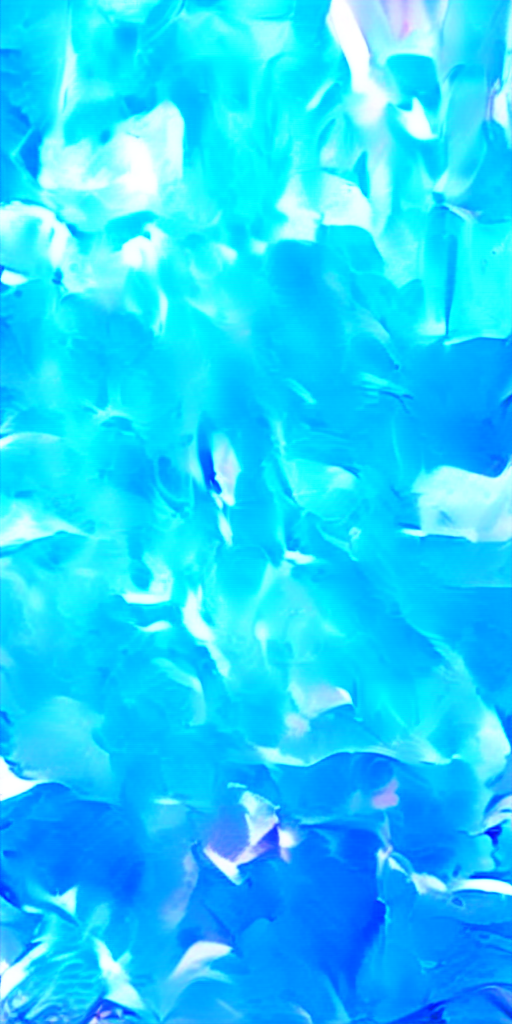

In [18]:
image_processor.postprocess(images)[0]